In [1]:
import torch
from torch import optim
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# [Minimal working example of optim.SGD](https://discuss.pytorch.org/t/minimal-working-example-of-optim-sgd/11623)
# [PyTorch批训练及优化器比较](https://blog.csdn.net/marsjhao/article/details/72055310)
# torch.randn?
# optim.SGD?
# Variable?
# plt.plot?
# torch.FloatTensor?
# optim.Adagrad?

In [3]:
N = 200

In [4]:
x_tensor = torch.randn(N, 1)

In [5]:
x_variable = Variable(x_tensor)

In [6]:
x_np = x_tensor.numpy()

In [7]:
x_np.shape

(200, 1)

In [8]:
y_np = 3 * x_np + 2

In [9]:
y_tensor = torch.FloatTensor(y_np)

In [10]:
y_variable = Variable(y_tensor, requires_grad=False)

In [11]:
y_np.shape

(200, 1)

In [12]:
# w = Variable(torch.randn(1, 1), requires_grad=True)
# b = Variable(torch.randn(1), requires_grad=True)

In [13]:
# w_init = torch.randn(1, 1)
# b_init = torch.randn(1)

In [14]:
epoches = 100
x_epoch_time = range(epoches)

('w:', Variable containing:
-2.9718
[torch.FloatTensor of size 1x1]
)
('b:', Variable containing:
 1.7070
[torch.FloatTensor of size 1]
)


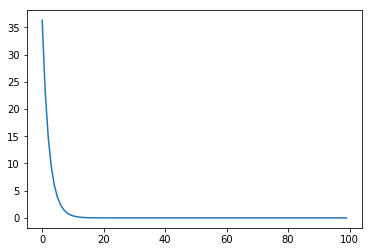

In [15]:
torch.manual_seed(1)
w = Variable(torch.randn(1, 1), requires_grad=True)
b = Variable(torch.randn(1), requires_grad=True)
print('w:', w)
print('b:', b)

sgd_losses = []

optimizer = optim.SGD([w, b], lr=0.1)

for epoch in range(epoches):
    optimizer.zero_grad()
    
    y_pred = torch.matmul(x_variable, w) + b
    # 均方差误差
    loss = ((y_pred-y_variable)**2).mean()
    loss.backward()
    optimizer.step()
#     print('loss:', loss)
    loss_np = loss.data.numpy()
    sgd_losses.append(loss_np)
    
plt.plot(x_epoch_time, sgd_losses)

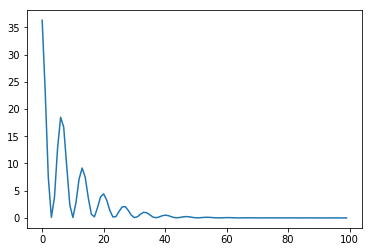

In [16]:
torch.manual_seed(1)
w = Variable(torch.randn(1, 1), requires_grad=True)
b = Variable(torch.randn(1), requires_grad=True)
# print('w:', w)
# print('b:', b)

sgd_momentum_losses = []

optimizer = optim.SGD([w, b], lr=0.1, momentum=0.9)

for epoch in range(epoches):
    optimizer.zero_grad()
    
    y_pred = torch.matmul(x_variable, w) + b
    # 均方差误差
    loss = ((y_pred-y_variable)**2).mean()
    loss.backward()
    optimizer.step()
#     print('loss:', loss)
    loss_np = loss.data.numpy()
    sgd_momentum_losses.append(loss_np)
    
plt.plot(x_epoch_time, sgd_momentum_losses)

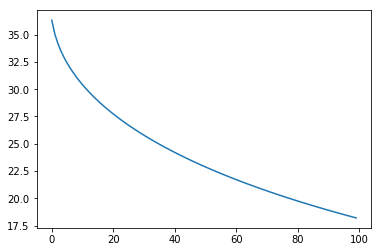

In [17]:
torch.manual_seed(1)
w = Variable(torch.randn(1, 1), requires_grad=True)
b = Variable(torch.randn(1), requires_grad=True)
# print('w:', w)
# print('b:', b)

adagrad_losses = []

optimizer = optim.Adagrad([w, b], lr=0.1)

for epoch in range(epoches):
    optimizer.zero_grad()
    y_pred = torch.matmul(x_variable, w) + b
    # 均方差误差
    loss = ((y_pred-y_variable)**2).mean()
    loss.backward()
    optimizer.step()
#     print('loss:', loss)
    loss_np = loss.data.numpy()
    adagrad_losses.append(loss_np)
    
plt.plot(x_epoch_time, adagrad_losses)

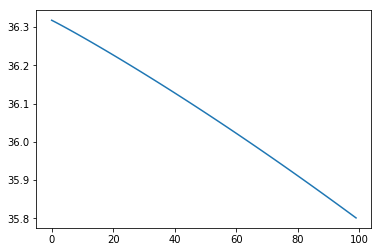

In [18]:
torch.manual_seed(1)
w = Variable(torch.randn(1, 1), requires_grad=True)
b = Variable(torch.randn(1), requires_grad=True)
# print('w:', w)
# print('b:', b)

adadelta_losses = []

optimizer = optim.Adadelta([w, b], lr=0.1)

for epoch in range(epoches):
    optimizer.zero_grad()
    y_pred = torch.matmul(x_variable, w) + b
    # 均方差误差
    loss = ((y_pred-y_variable)**2).mean()
    loss.backward()
    optimizer.step()
#     print('loss:', loss)
    loss_np = loss.data.numpy()
    adadelta_losses.append(loss_np)
    
plt.plot(x_epoch_time, adadelta_losses)

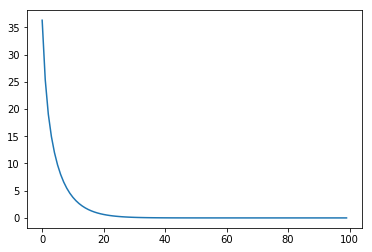

In [19]:
torch.manual_seed(1)
w = Variable(torch.randn(1, 1), requires_grad=True)
b = Variable(torch.randn(1), requires_grad=True)
# print('w:', w)
# print('b:', b)

rms_prop_losses = []

optimizer = optim.RMSprop([w, b], lr=0.1)

for epoch in range(epoches):
    optimizer.zero_grad()
    y_pred = torch.matmul(x_variable, w) + b
    # 均方差误差
    loss = ((y_pred-y_variable)**2).mean()
    loss.backward()
    optimizer.step()
#     print('loss:', loss)
    loss_np = loss.data.numpy()
    rms_prop_losses.append(loss_np)
    
plt.plot(x_epoch_time, rms_prop_losses)

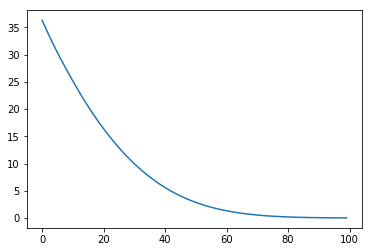

In [20]:
torch.manual_seed(1)
w = Variable(torch.randn(1, 1), requires_grad=True)
b = Variable(torch.randn(1), requires_grad=True)
# print('w:', w)
# print('b:', b)

adam_losses = []

optimizer = optim.Adam([w, b], lr=0.1)

for epoch in range(epoches):
    optimizer.zero_grad()
    y_pred = torch.matmul(x_variable, w) + b
    # 均方差误差
    loss = ((y_pred-y_variable)**2).mean()
    loss.backward()
    loss_np = loss.data.numpy()
    adam_losses.append(loss_np)
    optimizer.step()
#     print('loss:', loss)

plt.plot(x_epoch_time, adam_losses)

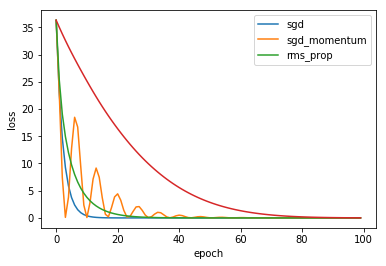

In [21]:
plt.plot(x_epoch_time, sgd_losses, label='sgd')
plt.plot(x_epoch_time, sgd_momentum_losses, label='sgd_momentum')
# plt.plot(x_epoch_time, adagrad_losses, label='adagrad')
# plt.plot(x_epoch_time, adadelta_losses, label='adadelta')
plt.plot(x_epoch_time, rms_prop_losses, label='rms_prop')
plt.plot(x_epoch_time, adam_losses)
plt.legend(loc='best')
plt.xlabel('epoch')
plt.ylabel('loss')